In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook
#%matplotlib inline

# Grid definition

In [2]:
g = 10                     #m/s^2
L = 500000                #m
teind = 20 * 24 * 3600        #sec

M = 20                    #[-]
N = 600                   #[-]

dx = L/M
dt = teind/N

d = 5 - 3/M*np.arange(M)

C = np.sqrt(g*np.max(d))*dt/dx

x = np.arange(0,L,dx)
t = np.arange(0,teind,dt)

if C > 1:
    print("Unstable timestep, courrant number =", C)
elif C > 0:
    print("stable timestep, courrant number =", C)

D = np.zeros((2*N,2*M))

stable timestep, courrant number = 0.814587011927


# Initial conditions

In [3]:
u0=-2               #m/s
Z0=0             # m 

for i in range(round(M)):
    D[0,2*i] = Z0
    D[2,2*i] = Z0
    D[1,1+2*i] = u0

# Boundary conditions

In [4]:
A = 0.5                #meter
w = 1.4E-4             #rad/sec

uUS = u0 * np.ones(N)
ZDS = A*np.cos(w*t)

for i in range(round(N)):
    D[2*i,0] = ZDS[i]
    D[1+2*i,2*(M-1)+1]= uUS[i]

#np.set_printoptions(precision=1)
#print(D)

#plt.plot(t,ZDS,'k',t,uUS,'r');

# Numerical simulation
- Explicit scheme
- Leapfrog aplied
- Advection modeled with upwinding

In [5]:
for n in range(1,round(N-1)):
    for m in range(0,round(M-1)):
        if D[2*n-1,2*m+1] > 0:
            A = D[2*n-1,2*m+1] *(D[2*n-1,2*m+1]-D[2*n-1,2*m-1])/dx
        else:
            A = D[2*n-1,2*m+1] *(D[2*n-1,2*m+3]-D[2*n-1,2*m+1])/dx
        
        D[2*n+1,2*m+1]=D[2*n-1,2*m+1] - (dt*g/dx)*(D[2*n,2*m+2]-D[2*n,2*m]) - dt*A
    for m in range(1,round(M-1)):
        hp = 0.5*(d[m]+d[m+1]+D[2*n,2*m]+D[2*n,2*m+1])
        hm = 0.5*(d[m]+d[m-1]+D[2*n,2*m]+D[2*n,2*m-1])
        
        D[2*n+2,2*m] = D[2*n,2*m] - (dt/dx)*(hp*D[2*n+1,2*m+1]-hm*D[2*n+1,2*m-1]) 
    
    m = M-1
    D[2*n+2,2*m] = D[2*n+2,2*m-2]

In [6]:
#np.set_printoptions(precision=1)
#print(D)

# plotting

<IPython.core.display.Javascript object>


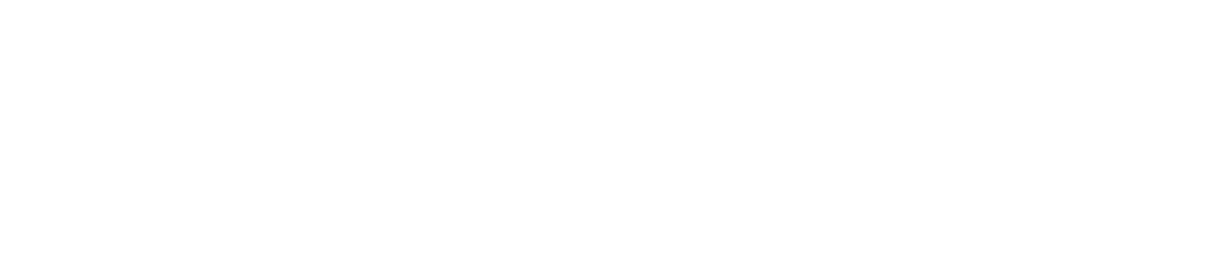

In [7]:
time  = teind/500               #sec
T = round(time/dt)

pZ = np.zeros(M)
pu = np.zeros(M)

for m in range(round(M)):
    pZ[m] = D[2*T,2*m]
    pu[m] = D[2*T+1,1+2*m]

    
fig = plt.figure(figsize=(9,2))
plt.plot(x,pZ,x,-d,x,pu,'r');

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


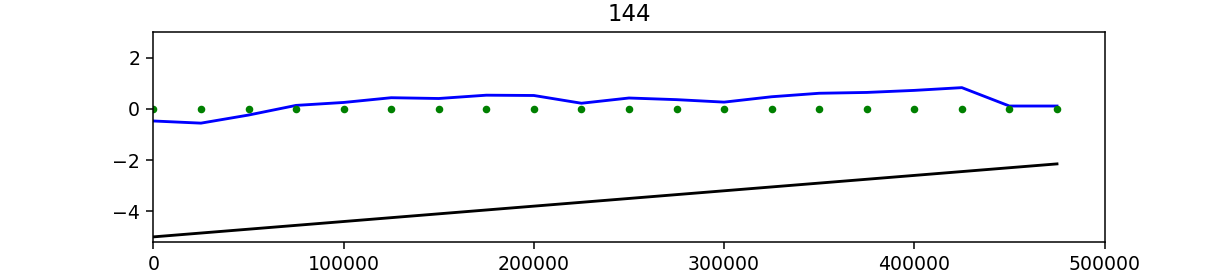

In [11]:
def update_line(i, line):
    t = i
    plt.title(round(t*dt/3600))
    for m in range(round(M)):
        pZ[m] = D[2*t,2*m]
    line.set_data([x], [pZ])

fig = plt.figure(figsize=(9,2))
ax = plt.subplot(111, xlim=(0,L), ylim=(-5.2, 3))
line, = plt.plot([], [], 'b')

plt.plot(x,-d , 'k',x,Z0*np.ones(len(x)), '.g')
plt.show()

animation.FuncAnimation(fig, update_line, fargs=[line], interval=100)

<IPython.core.display.Javascript object>


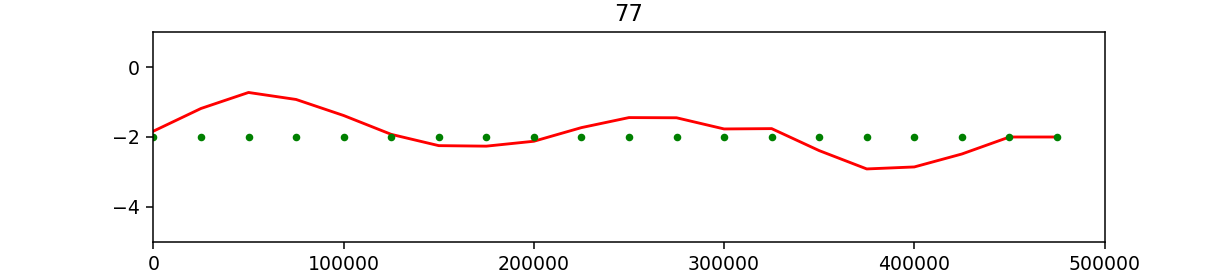

In [13]:
def update_line(i, line):
    t = i
    plt.title(round(t*dt/3600))
    for m in range(round(M)):
        pZ[m] = D[2*t+1,1+2*m]
    line.set_data([x], [pZ])

fig = plt.figure(figsize=(9,2))
ax = plt.subplot(111, xlim=(0,L), ylim=(u0-3, u0+3))
line, = plt.plot([], [], 'r')

plt.plot(x,u0*np.ones(len(x)), '.g')
plt.show()

animation.FuncAnimation(fig, update_line, fargs=[line], interval=100)